In [107]:
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing, feature_selection

import psutil
import warnings
warnings.filterwarnings('ignore')

In [2]:
input_directory = Path(r"..\\Data\\Input")

feature_directory = Path(r"..\\Data\\Feature")

In [76]:
df_data = pd.read_parquet(input_directory/'train_low_mem.parquet', engine='pyarrow').set_index(['time_id','investment_id'])


df_data.info()

row_id    target       f_0       f_1       f_2  \
time_id investment_id                                                  
0       1                0_1 -0.300875  0.932573  0.113691 -0.402206   
        2                0_2 -0.231040  0.810802 -0.514115  0.742368   
        6                0_6  0.568807  0.393974  0.615937  0.567806   
        7                0_7 -1.064780 -2.343535 -0.011870  1.874606   
        8                0_8 -0.531940  0.842057 -0.262993  2.330030   

                            f_3       f_4       f_5       f_6       f_7  ...  \
time_id investment_id                                                    ...   
0       1              0.378386 -0.203938 -0.413469  0.965623  1.230508  ...   
        2             -0.616673 -0.194255  1.771210  1.428127  1.134144  ...   
        6             -0.607963  0.068883 -1.083155  0.979656 -1.125681  ...   
        7             -0.606346 -0.586827 -0.815737  0.778096  0.298990  ...   
        8             -0.583422 -0.618392 -0.742814 -0.946789  1.230508  ...   

                          f_290     f_291     f_292     f_293     f_294  \
time_id investment_id                                                     
0       1              0.366028 -1.095620  0.200075  0.819155  0.941183   
        2             -0.154193  0.912726 -0.734579  0.819155  0.941183   
        6             -0.138020  0.912726 -0.551904 -1.220772 -1.060166   
        7              0.382201  0.912726 -0.266359 -1.220772  0.941183   
        8             -0.170365  0.912726 -0.741355 -1.220772  0.941183   

                          f_295     f_296     f_297     f_298     f_299  
time_id investment_id                                                    
0       1             -0.086764 -1.087009 -1.044826 -0.287605  0.321566  
        2             -0.387617 -1.087009 -0.929529 -0.974060 -0.343624  
        6             -0.219097 -1.087009 -0.612428 -0.113944  0.243608  
        7             -0.609113  0.104928 -0.783423  1.151730 -0.773309  
        8             -0.588445  0.104928  0.753279  1.345611 -0.737624  

[5 rows x 302 columns]

target       f_0       f_1       f_2       f_3  \
time_id investment_id                                                     
0       1             -0.300875  0.932573  0.113691 -0.402206  0.378386   
        2             -0.231040  0.810802 -0.514115  0.742368 -0.616673   
        6              0.568807  0.393974  0.615937  0.567806 -0.607963   
        7             -1.064780 -2.343535 -0.011870  1.874606 -0.606346   
        8             -0.531940  0.842057 -0.262993  2.330030 -0.583422   

                            f_4       f_5       f_6       f_7       f_8  ...  \
time_id investment_id                                                    ...   
0       1             -0.203938 -0.413469  0.965623  1.230508  0.114809  ...   
        2             -0.194255  1.771210  1.428127  1.134144  0.114809  ...   
        6              0.068883 -1.083155  0.979656 -1.125681  0.114809  ...   
        7             -0.586827 -0.815737  0.778096  0.298990  0.114809  ...   
        8             -0.618392 -0.742814 -0.946789  1.230508  0.114809  ...   

                          f_290     f_291     f_292     f_293     f_294  \
time_id investment_id                                                     
0       1              0.366028 -1.095620  0.200075  0.819155  0.941183   
        2             -0.154193  0.912726 -0.734579  0.819155  0.941183   
        6             -0.138020  0.912726 -0.551904 -1.220772 -1.060166   
        7              0.382201  0.912726 -0.266359 -1.220772  0.941183   
        8             -0.170365  0.912726 -0.741355 -1.220772  0.941183   

                          f_295     f_296     f_297     f_298     f_299  
time_id investment_id                                                    
0       1             -0.086764 -1.087009 -1.044826 -0.287605  0.321566  
        2             -0.387617 -1.087009 -0.929529 -0.974060 -0.343624  
        6             -0.219097 -1.087009 -0.612428 -0.113944  0.243608  
        7             -0.609113  0.104928 -0.783423  1.151730 -0.773309  
        8             -0.588445  0.104928  0.753279  1.345611 -0.737624  

[5 rows x 301 columns]

In [96]:
df_data_norm = df_data.copy()

normalization_dict = {}
for i in tqdm(range(300)):
    feature = f'f_{i}'

    normalization = preprocessing.QuantileTransformer(
        output_distribution='normal', random_state=0).fit(df_data[feature].values.reshape(-1, 1))
    normalization_dict[feature] = normalization

    df_data_norm[feature] = normalization.transform(
        df_data[feature].values.reshape(-1, 1))


In [97]:
f"memory: {psutil.virtual_memory().percent/100:.2%}"

'memory: 78.70%'

In [6]:
# df_IC_tseries = pd.DataFrame()

# features_list = [f'f_{i}' for i in range(300)]
# for feature in tqdm(features_list):
#     df_IC_tseries[feature] = df_data.groupby(level='time_id').apply(
#         lambda x: np.corrcoef(x['target'], x[feature])[0][1])
# df_IC_tseries.to_parquet(feature_directory/'df_IC_tseries.parquet')

df_IC_tseries = pd.read_parquet(feature_directory/'df_IC_tseries.parquet')

df_IC_tseries.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 1211 entries, 0 to 1219
Columns: 300 entries, f_0 to f_299
dtypes: float64(300)
memory usage: 2.8 MB


In [69]:
df_IC = pd.DataFrame()
df_IC['IC_mean'] = df_IC_tseries.mean()
df_IC['IC_t_stats'] = df_IC_tseries.mean()/df_IC_tseries.std()
df_IC['IC_t_stats_abs'] = np.abs(df_IC['IC_t_stats'])
df_IC = df_IC.sort_values('IC_t_stats_abs', ascending=False)

round(df_IC, 3).to_csv(feature_directory/'df_IC_statistics.csv')
df_IC


,IC_mean,IC_t_stats,IC_t_stats_abs
f_231,-0.063065,-0.986945,0.986945
f_225,0.040995,0.726556,0.726556
f_153,0.031634,0.689957,0.689957
f_145,0.036905,0.669925,0.669925
f_179,-0.046018,-0.615216,0.615216
...,...,...,...
f_291,0.000658,0.009531,0.009531
f_30,-0.000812,-0.008355,0.008355
f_269,-0.000589,-0.007255,0.007255
f_129,0.000901,0.006762,0.006762


In [118]:
def feature_plot(df_data, feature, target):
    df_temp = df_data[[target, feature]]

    corr = df_temp.corr()[feature][target]
    # mi = feature_selection.mutual_info_regression(
    #     df_temp[target].values.reshape(-1, 1), df_temp[feature].values.reshape(-1, 1))[0]

    # df_temp[f'{feature}_clip'] = df_temp[feature].clip(lower=df_temp[feature].quantile(
    #     0.01), upper=df_temp[feature].quantile(0.99))
    df_temp[f'{feature}_qcut'] = pd.qcut(
        df_temp[f'{feature}'], q=10, duplicates='drop')
    df_temp[f'{feature}_qcut'] = df_temp[f'{feature}_qcut'].apply(
        lambda x: round(x.mid, 4))

    fig = plt.figure(figsize=(12, 6))

    ax = plt.subplot(211)
    sns.histplot(df_temp[f'{feature}'], bins=200, ax=ax)

    ax = plt.subplot(212)

    x = df_temp.groupby(f'{feature}_qcut').mean().index
    y = df_temp.groupby(f'{feature}_qcut').mean()['target']

    c = df_temp.groupby(f'{feature}_qcut').std()[
        'target']/np.sqrt(df_temp.groupby(f'{feature}_qcut').count()['target'])
    c_upper = y+10*c
    c_lower = y-10*c
    ymax = np.max(c_upper)
    ymin = np.min(c_lower)

    sns.lineplot(x, y)
    ax.fill_between(x, y-c, y+c, color='b', alpha=0.1)
    ax.vlines(x, ymin=ymin, ymax=ymax, color='grey')
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.text(x=.9, y=.9,
            s=f'corr: {corr:.3f}', transform=ax.transAxes)

    plt.tight_layout()
    plt.show()

    return


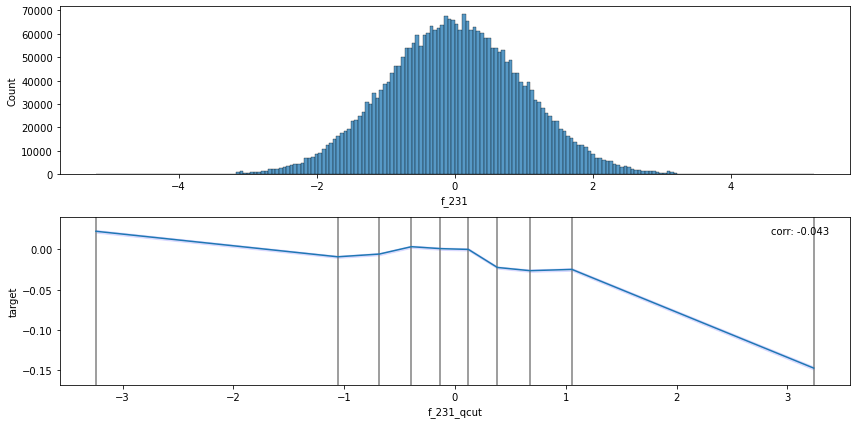

,IC_mean,IC_t_stats,IC_t_stats_abs
f_231,-0.063065,-0.986945,0.986945


In [119]:
feature = 'f_231'
target = 'target'


feature_plot(df_data_norm, feature, target)
df_IC.loc[feature,:].to_frame().T


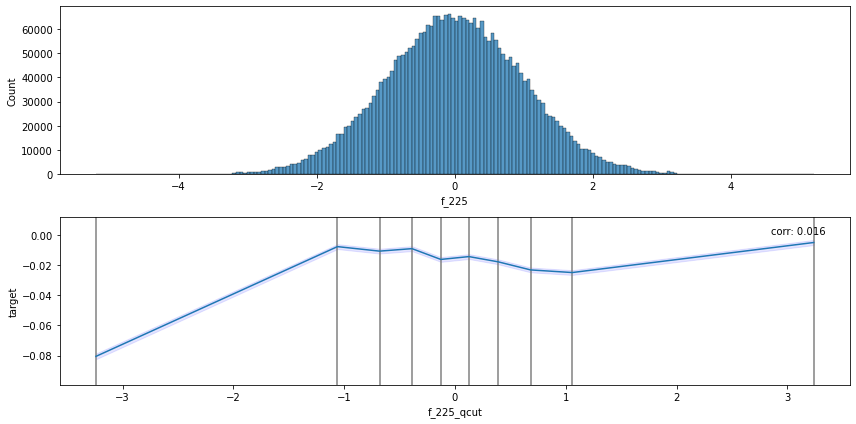

In [120]:
feature = 'f_225'
target = 'target'

feature_plot(df_data_norm, feature, target)

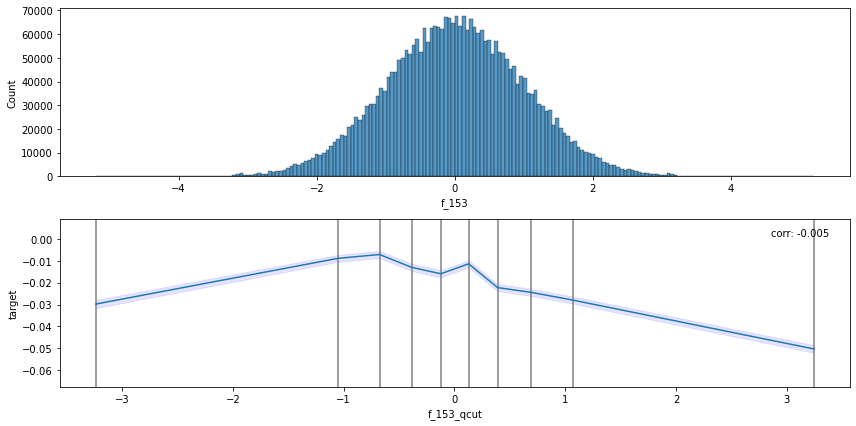

In [121]:
feature = 'f_153'
target = 'target'

feature_plot(df_data_norm, feature, target)

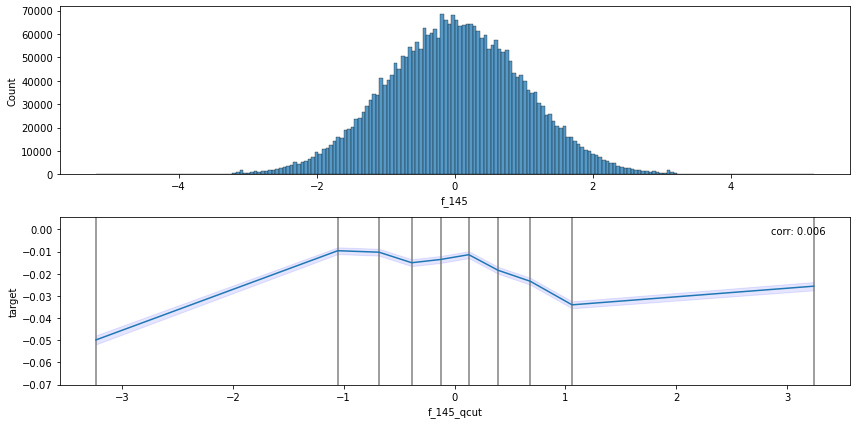

In [123]:
feature = 'f_145'
target = 'target'

feature_plot(df_data_norm, feature, target)

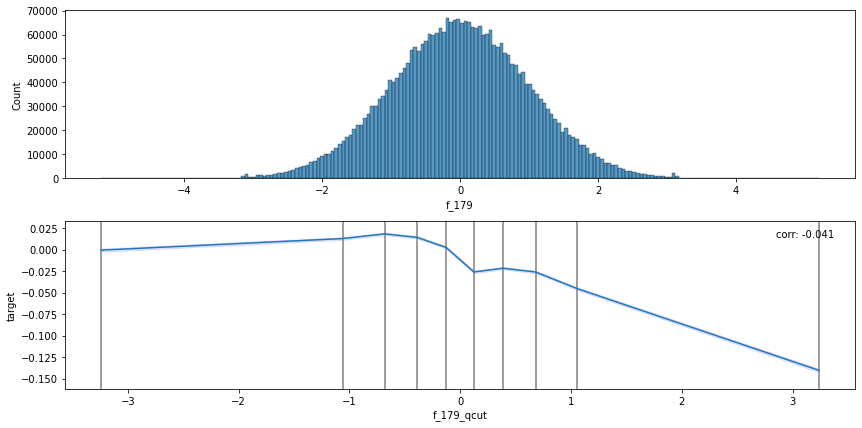

In [124]:
feature = 'f_179'
target = 'target'

feature_plot(df_data_norm, feature, target)

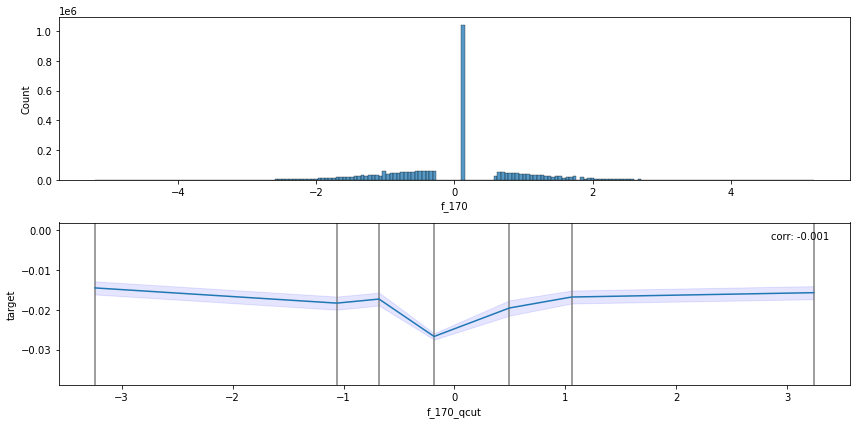

In [125]:
feature = 'f_170'
target = 'target'

feature_plot(df_data_norm, feature, target)

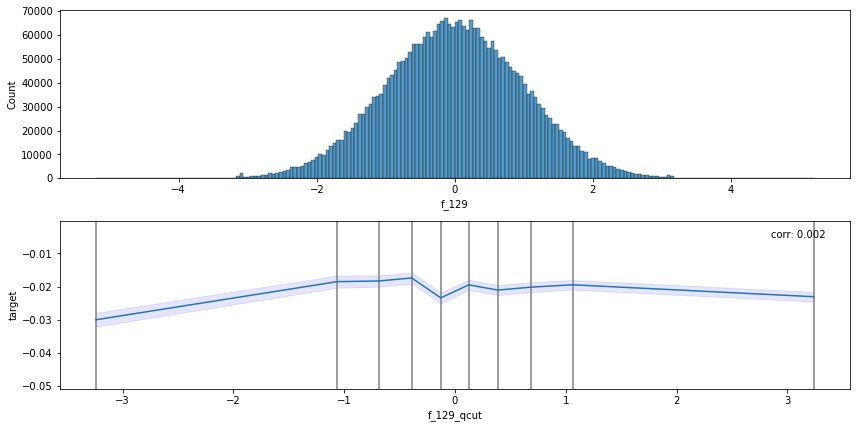

In [126]:
feature = 'f_129'
target = 'target'

feature_plot(df_data_norm, feature, target)

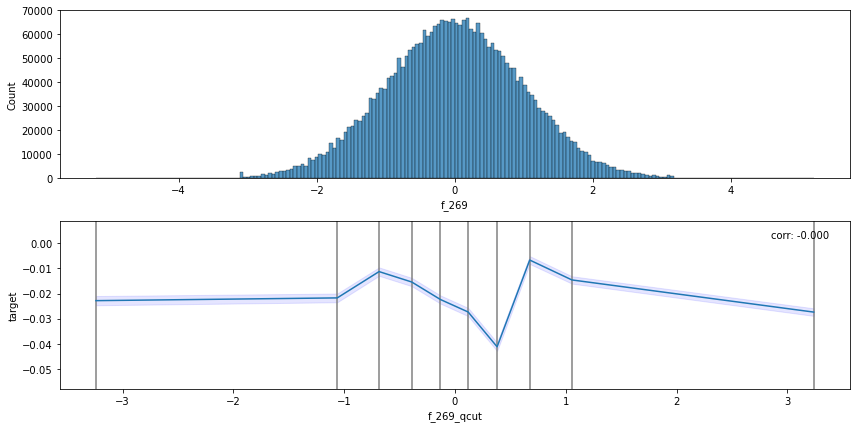

In [127]:
feature = 'f_269'
target = 'target'

feature_plot(df_data_norm, feature, target)

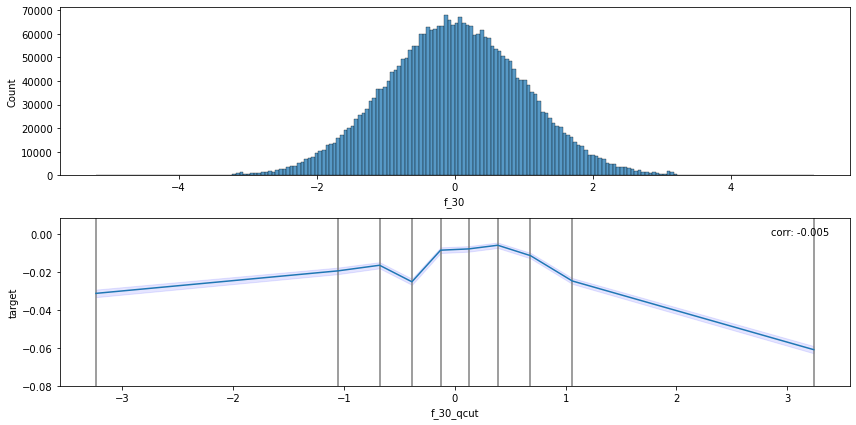

In [128]:
feature = 'f_30'
target = 'target'

feature_plot(df_data_norm, feature, target)